In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
import seaborn as sns


In [2]:
from rich import print

In [3]:
DATA_PATH = "../Data/default of credit card clients.xls"

In [4]:
df = pd.read_excel(DATA_PATH, index_col=0, header=1)
df.rename(columns={'default payment next month': 'default_nm'}, inplace=True)

In [5]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nm
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   30000 non-null  int64
 1   SEX         30000 non-null  int64
 2   EDUCATION   30000 non-null  int64
 3   MARRIAGE    30000 non-null  int64
 4   AGE         30000 non-null  int64
 5   PAY_0       30000 non-null  int64
 6   PAY_2       30000 non-null  int64
 7   PAY_3       30000 non-null  int64
 8   PAY_4       30000 non-null  int64
 9   PAY_5       30000 non-null  int64
 10  PAY_6       30000 non-null  int64
 11  BILL_AMT1   30000 non-null  int64
 12  BILL_AMT2   30000 non-null  int64
 13  BILL_AMT3   30000 non-null  int64
 14  BILL_AMT4   30000 non-null  int64
 15  BILL_AMT5   30000 non-null  int64
 16  BILL_AMT6   30000 non-null  int64
 17  PAY_AMT1    30000 non-null  int64
 18  PAY_AMT2    30000 non-null  int64
 19  PAY_AMT3    30000 non-null  int64
 20  PAY_AMT4    30000 non-null  int64

In [7]:
df[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [8]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [9]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [10]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 
cat = ['SEX', 'EDUCATION', 'MARRIAGE']
other = ['LIMIT_BAL', 'AGE']

# Data Cleaning

In [13]:
df.rename(columns={"default.payment.next.month": "def_pay",
                    'PAY_0': 'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nm
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

In [15]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [16]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)


In [17]:
# df.to_csv('../Data/cleaned_loan_data.csv')

# EDA

## Demographic

SEX

Value  Count  Percentage
SEX                          
1        1  11888   39.626667
2        2  18112   60.373333

--------------------------

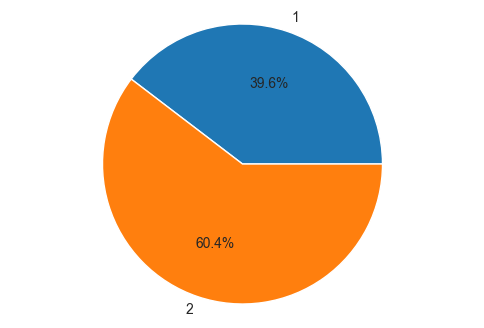

In [18]:
def show_value_counts(col):
    print(col)
    value_counts = df[col].value_counts()
    percentage = value_counts / len(df) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)
    
    
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()
    

show_value_counts('SEX')

EDUCATION

Value  Count  Percentage
EDUCATION                          
1              1  10585   35.283333
2              2  14030   46.766667
3              3   4917   16.390000
4              4    468    1.560000

--------------------------

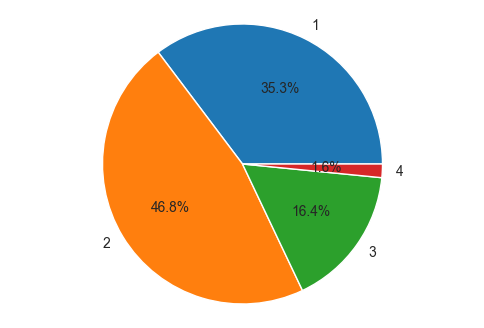

In [19]:
show_value_counts('EDUCATION')

MARRIAGE

Value  Count  Percentage
MARRIAGE                          
1             1  13659   45.530000
2             2  15964   53.213333
3             3    377    1.256667

--------------------------

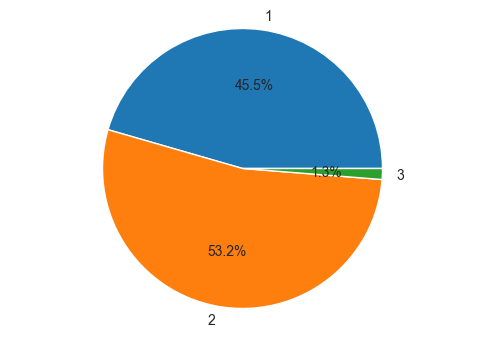

In [20]:
show_value_counts('MARRIAGE')

<Axes: xlabel='AGE', ylabel='Count'>

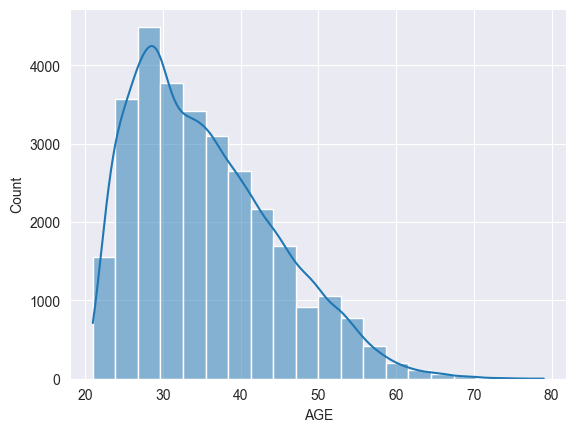

In [21]:
sns.histplot(df['AGE'], bins=20, kde=True)

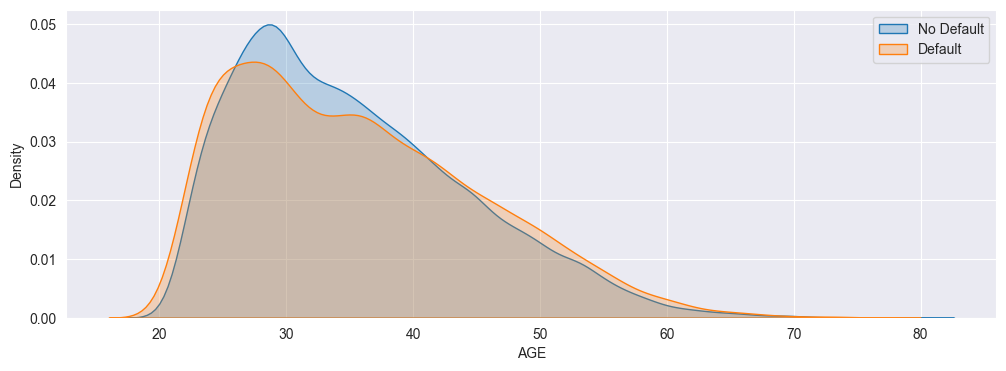

In [22]:


plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default_nm'] == 0), 'AGE'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['default_nm'] == 1), 'AGE'], label = 'Default', fill = True)
plt.legend()
plt.show()


## Correlation

<Axes: >

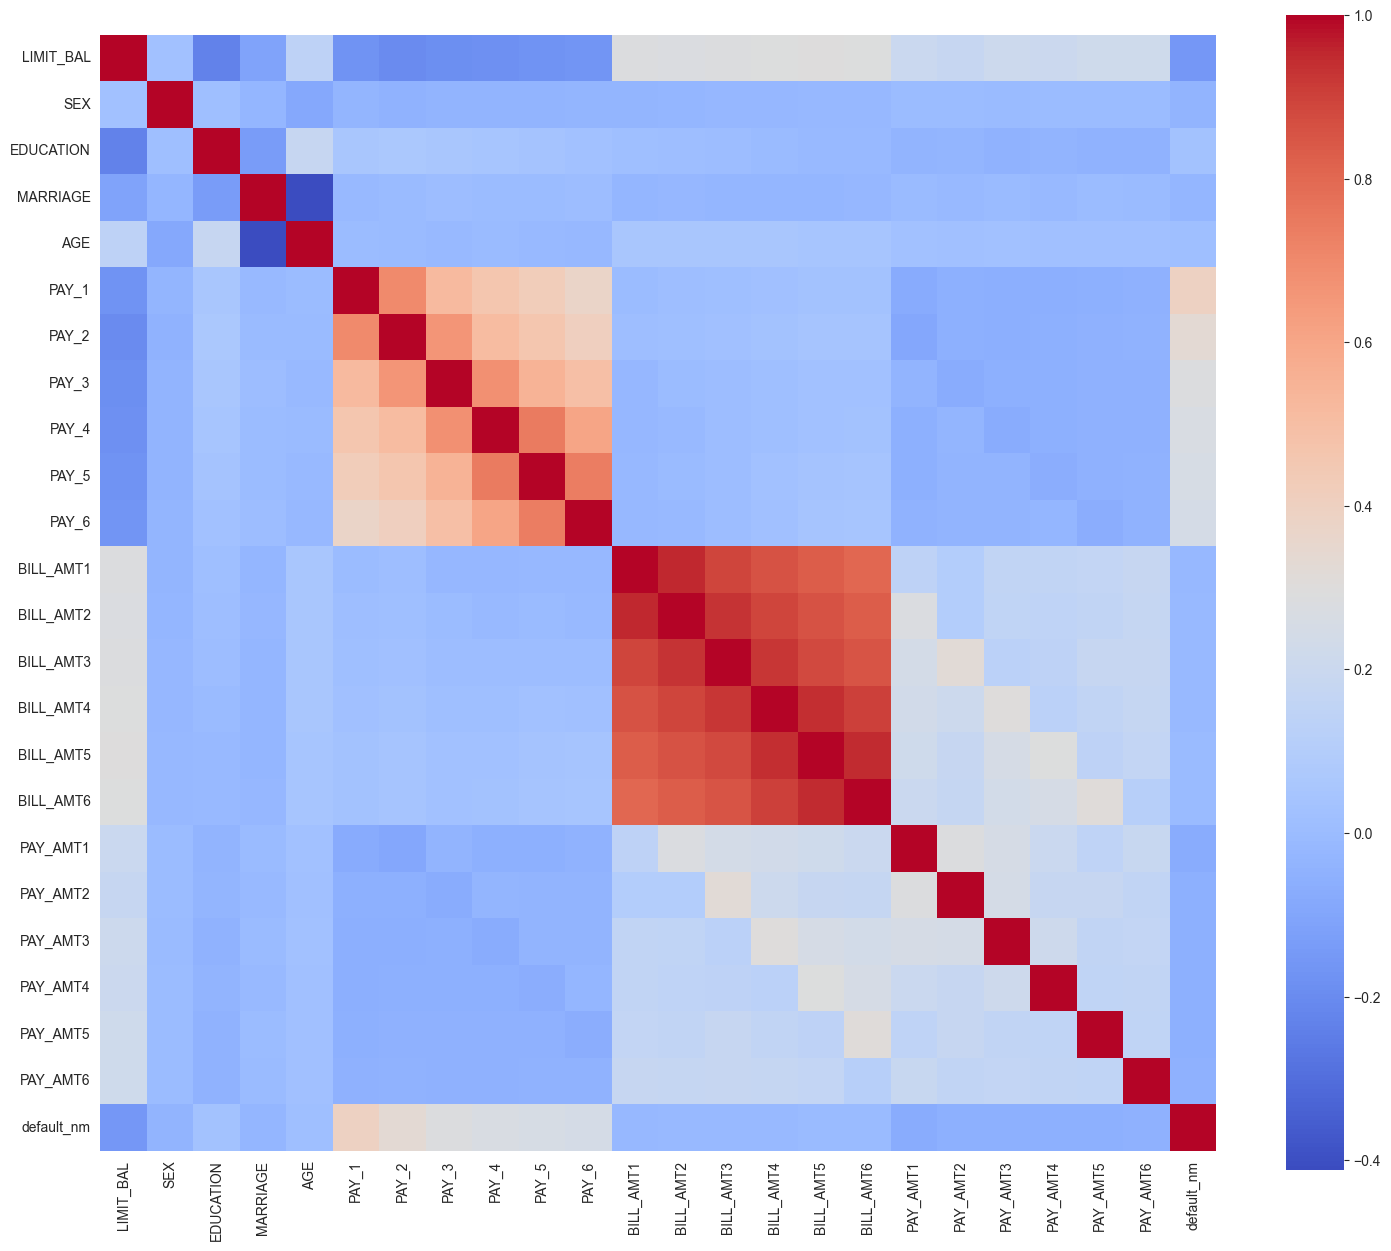

In [23]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),square=True,cmap='coolwarm')

# Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler

# Unique Values

In [25]:
data = pd.read_csv("../Data/cleaned_loan_data.csv")
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=142, stratify=y)

In [27]:
groups = []

for col in data.columns[1:-1]:
    groups.append([col, 'default_nm'])

In [28]:
for i, group in enumerate(groups):
    print(i, group)

0
['LIMIT_BAL', 'default_nm']

1
['SEX', 'default_nm']

2
['EDUCATION', 'default_nm']

3
['MARRIAGE', 'default_nm']

4
['AGE', 'default_nm']

5
['PAY_1', 'default_nm']

6
['PAY_2', 'default_nm']

7
['PAY_3', 'default_nm']

8
['PAY_4', 'default_nm']

9
['PAY_5', 'default_nm']

10
['PAY_6', 'default_nm']

11
['BILL_AMT1', 'default_nm']

12
['BILL_AMT2', 'default_nm']

13
['BILL_AMT3', 'default_nm']

14
['BILL_AMT4', 'default_nm']

15
['BILL_AMT5', 'default_nm']

16
['BILL_AMT6', 'default_nm']

17
['PAY_AMT1', 'default_nm']

18
['PAY_AMT2', 'default_nm']

19
['PAY_AMT3', 'default_nm']

20
['PAY_AMT4', 'default_nm']

21
['PAY_AMT5', 'default_nm']

22
['PAY_AMT6', 'default_nm']

# Weight of Evidence

In [29]:
def WOE_Dataframe(df, group):
    from sklearn.tree import DecisionTreeClassifier
    def decision_tree_binning(data, feature, target, max_leaf_nodes=10):
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
        dt.fit(data[[feature]], data[target])

        thresholds = dt.tree_.threshold
        thresholds = thresholds[thresholds != -2]  # Remove -2 which indicates non-split nodes
        bins = np.sort(np.unique(np.concatenate(([data[feature].min()], thresholds, [data[feature].max()]))))
        return bins
        
    def calculate_woe(row):
        if row['Default_Proportion'] == 0 or row['Non-Default_Proportion'] == 0:
            return 0
        else:
            return np.log(row['Default_Proportion'] / row['Non-Default_Proportion'])

    df = df[group].copy()
    col, target = group[0], group[1]
    results = pd.DataFrame(columns=['Range','Bins', 'Default', 'Non-Default', 'Default_Proportion', 'Non-Default_Proportion', 'WOE', 'IV'])
    val_count = 0
    var = 'Range'
    if group[0] in ['MARRIAGE', 'EDUCATION', 'SEX', 'PAY_1'] + pay :
        results['Bins'] = df.iloc[:,0].unique()
        results.drop(columns='Range', inplace=True)
        results.sort_values(by='Bins', inplace=True, ignore_index=True)
        results.rename(columns={'Bins': 'Values'}, inplace=True)
        val_count = df.iloc[:,0].value_counts()
        var = 'Values'
    else:
        thresholds = decision_tree_binning(df, *group)
        results[['Range', 'Bins']] = [[f"{str(np.round(thresholds[i], 2))} - {str(np.round(thresholds[i+1], 2))}", i + 1] for i in range(len(thresholds)-1)]
        df.loc[:,'bins'] = pd.cut(df[group[0]], bins=thresholds, labels=results['Range'], include_lowest=True)
        val_count = df.bins.value_counts()
        col = 'bins'
        
    cat_counts_pos = df[df[target] == 1][col].value_counts().sort_index()
    cat_counts_neg = df[df[target] == 0][col].value_counts().sort_index()
    val_count.sort_index(inplace=True)

    results['Default'] = results[var].map(cat_counts_pos).fillna(0)
    results['Non-Default'] = results[var].map(cat_counts_neg).fillna(0)
    results['Default_Proportion'] = results['Default'] / results['Default'].sum()
    results['Non-Default_Proportion'] = results['Non-Default'] / results['Non-Default'].sum()

    results['WOE'] = results.apply(calculate_woe, axis=1)
    results['IV'] = (results['Default_Proportion'] - results['Non-Default_Proportion']) * results['WOE']
    iv_sum = round(results['IV'].sum(),6)
    predictive_power = ''
    if iv_sum <= 0.02: 
        predictive_power += 'Not Useful For Prediction'
    elif 0.02 < iv_sum <= 0.1:
        predictive_power += 'Weak Predictive Power'
    elif 0.1 < iv_sum <= 0.3:
        predictive_power += 'Medium Predictive Power'
    elif 0.3 < iv_sum <= 0.5:
        predictive_power += 'Strong Predictive Power'
    else:
        predictive_power += 'Suspicious Predictive Power'
        
    print("Information value of " + group[0] + " is " + str(iv_sum) + "\n" + 
          "The Independent Variable is a " + f"[bold white]{predictive_power}[/bold white]")
    
    return iv_sum, predictive_power, results

iv_sum, predictive_power, res = WOE_Dataframe(data, groups[10])
res

Information value of PAY_6 is 0.289713
The Independent Variable is a Medium Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,5025,21896.0,0.757233,0.937168,-0.213192,0.038361
1,2,1401,1365.0,0.211121,0.058423,1.284719,0.196174
2,3,118,66.0,0.017782,0.002825,1.839717,0.027517
3,4,31,18.0,0.004671,0.000770,1.802302,0.007031
4,5,7,6.0,0.001055,0.000257,1.412838,0.001128
5,6,14,5.0,0.002110,0.000214,2.288306,0.004338
6,7,38,8.0,0.005726,0.000342,2.816832,0.015166
7,8,2,0.0,0.000301,0.000000,0.000000,0.000000


In [30]:
selected_feat = []

for group in groups:
    iv_sum, predictive_power, res_df = WOE_Dataframe(data, group)
    if 0.02 < iv_sum <= 0.5:
        selected_feat.append(group[0])
    print()

Information value of LIMIT_BAL is 0.183522
The Independent Variable is a Medium Predictive Power

Information value of SEX is 0.00918
The Independent Variable is a Not Useful For Prediction

Information value of EDUCATION is 0.037299
The Independent Variable is a Weak Predictive Power

Information value of MARRIAGE is 0.005433
The Independent Variable is a Not Useful For Prediction

Information value of AGE is 0.02461
The Independent Variable is a Weak Predictive Power

Information value of PAY_1 is 0.864573
The Independent Variable is a Suspicious Predictive Power

Information value of PAY_2 is 0.546058
The Independent Variable is a Suspicious Predictive Power

Information value of PAY_3 is 0.412422
The Independent Variable is a Strong Predictive Power

Information value of PAY_4 is 0.362291
The Independent Variable is a Strong Predictive Power

Information value of PAY_5 is 0.334759
The Independent Variable is a Strong Predictive Power

Information value of PAY_6 is 0.289713
The Independent Variable is a Medium Predictive Power

Information value of BILL_AMT1 is 0.020594
The Independent Variable is a Weak Predictive Power

Information value of BILL_AMT2 is 0.029051
The Independent Variable is a Weak Predictive Power

Information value of BILL_AMT3 is 0.018934
The Independent Variable is a Not Useful For Prediction

Information value of BILL_AMT4 is 0.045962
The Independent Variable is a Weak Predictive Power

Information value of BILL_AMT5 is 0.047969
The Independent Variable is a Weak Predictive Power

Information value of BILL_AMT6 is 0.026221
The Independent Variable is a Weak Predictive Power

Information value of PAY_AMT1 is 0.193049
The Independent Variable is a Medium Predictive Power

Information value of PAY_AMT2 is 0.173619
The Independent Variable is a Medium Predictive Power

Information value of PAY_AMT3 is 0.138867
The Independent Variable is a Medium Predictive Power

Information value of PAY_AMT4 is 0.120301
The Independent Variable is a Medium Predictive Power

Information value of PAY_AMT5 is 0.101773
The Independent Variable is a Medium Predictive Power

Information value of PAY_AMT6 is 0.104074
The Independent Variable is a Medium Predictive Power

In [35]:
from pprint import pprint
pprint(selected_feat)

['LIMIT_BAL',
 'EDUCATION',
 'AGE',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']


In [32]:
from IPython.display import display, HTML

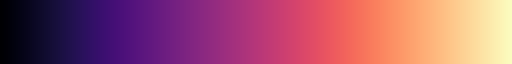

In [33]:
sns.color_palette("magma", as_cmap=True)

In [34]:
for group in groups:
    iv_sum, predictive_power, res_df = WOE_Dataframe(data, group)
    styled_df = res_df.style.background_gradient(cmap='magma', subset=['WOE', 'IV'], axis=0)
    display(HTML(styled_df.to_html()))

Information value of LIMIT_BAL is 0.183522
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,10000.0 - 13000.0,1,197,296,0.029687,0.012669,0.851531,0.014491
1,13000.0 - 45000.0,2,1358,2460,0.204641,0.105290,0.664539,0.066023
2,45000.0 - 55000.0,3,885,2480,0.133363,0.106146,0.228261,0.006213
3,55000.0 - 75000.0,4,443,1113,0.066757,0.047637,0.337442,0.006452
4,75000.0 - 125000.0,5,1112,3468,0.167571,0.148433,0.121269,0.002321
5,125000.0 - 145000.0,6,327,1151,0.049277,0.049264,0.000261,0.000000
6,145000.0 - 245000.0,7,1326,6317,0.199819,0.270373,-0.302391,0.021335
7,245000.0 - 355000.0,8,540,3170,0.081374,0.135679,-0.511231,0.027762
8,355000.0 - 365000.0,9,154,727,0.023207,0.031116,-0.293287,0.002320
9,365000.0 - 1000000.0,10,294,2182,0.044304,0.093392,-0.745730,0.036606


Information value of SEX is 0.00918
The Independent Variable is a Not Useful For Prediction

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,1,2873,9015,0.432942,0.385850,0.115154,0.005423
1,2,3763,14349,0.567058,0.614150,-0.079777,0.003757


Information value of EDUCATION is 0.037299
The Independent Variable is a Weak Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,1,2036,8549,0.306811,0.365905,-0.176140,0.010409
1,2,3330,10700,0.501808,0.457970,0.091416,0.004008
2,3,1237,3680,0.186407,0.157507,0.168463,0.004869
3,4,33,435,0.004973,0.018618,-1.320151,0.018014


Information value of MARRIAGE is 0.005433
The Independent Variable is a Not Useful For Prediction

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,1,3206,10453,0.483122,0.447398,0.076822,0.002744
1,2,3341,12623,0.503466,0.540276,-0.070563,0.002597
2,3,89,288,0.013412,0.012327,0.084363,0.000092


Information value of AGE is 0.02461
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,21.0 - 21.5,1,14,53,0.002110,0.002268,-0.072548,0.000012
1,21.5 - 22.5,2,169,391,0.025467,0.016735,0.419878,0.003666
2,22.5 - 25.5,3,849,2395,0.127939,0.102508,0.221608,0.005636
3,25.5 - 35.5,4,2565,10373,0.386528,0.443974,-0.138561,0.007960
4,35.5 - 44.5,5,1745,6160,0.262960,0.263653,-0.002635,0.000002
5,44.5 - 45.5,6,116,501,0.017480,0.021443,-0.204329,0.000810
6,45.5 - 46.5,7,157,413,0.023659,0.017677,0.291485,0.001744
7,46.5 - 59.5,8,925,2835,0.139391,0.121341,0.138684,0.002503
8,59.5 - 61.5,9,44,79,0.006631,0.003381,0.673429,0.002188
9,61.5 - 79.0,10,52,164,0.007836,0.007019,0.110064,0.000090


Information value of PAY_1 is 0.864573
The Independent Variable is a Suspicious Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,3207,19975,0.483273,0.854948,-0.570459,0.212025
1,1,1252,2436,0.188668,0.104263,0.593072,0.050058
2,2,1844,823,0.277878,0.035225,2.065423,0.501181
3,3,244,78,0.036769,0.003338,2.399146,0.080205
4,4,52,24,0.007836,0.001027,2.031877,0.013835
5,5,13,13,0.001959,0.000556,1.258687,0.001765
6,6,6,5,0.000904,0.000214,1.441009,0.000995
7,7,7,2,0.001055,0.000086,2.511450,0.002434
8,8,11,8,0.001658,0.000342,1.577141,0.002074


Information value of PAY_2 is 0.546058
The Independent Variable is a Suspicious Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,4160.000000,21402,0.626884,0.916025,-0.379282,0.109666
1,1,5.000000,23,0.000753,0.000984,-0.267369,0.000062
2,2,2184.000000,1743,0.329114,0.074602,1.484237,0.377756
3,3,201.000000,125,0.030289,0.005350,1.733678,0.043237
4,4,50.000000,49,0.007535,0.002097,1.278890,0.006954
5,5,15.000000,10,0.002260,0.000428,1.664152,0.003049
6,6,9.000000,3,0.001356,0.000128,2.357299,0.002894
7,7,12.000000,8,0.001808,0.000342,1.664152,0.002439
8,8,0.000000,1,0.000000,0.000043,0.000000,-0.000000


Information value of PAY_3 is 0.412422
The Independent Variable is a Strong Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,4434,21353,0.668174,0.913927,-0.313203,0.076971
1,1,1,3,0.000151,0.000128,0.160075,0.000004
2,2,1969,1850,0.296715,0.079182,1.321027,0.287367
3,3,138,102,0.020796,0.004366,1.560968,0.025647
4,4,44,32,0.006631,0.001370,1.577141,0.008297
5,5,12,9,0.001808,0.000385,1.546369,0.002201
6,6,14,9,0.002110,0.000385,1.700520,0.002933
7,7,22,5,0.003315,0.000214,2.740292,0.008498
8,8,2,1,0.000301,0.000043,1.951834,0.000505


Information value of PAY_4 is 0.362291
The Independent Variable is a Strong Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,4757,21733,0.716847,0.930192,-0.260528,0.055582
1,1,1,1,0.000151,0.000043,1.258687,0.000136
2,2,1653,1506,0.249096,0.064458,1.351822,0.249597
3,3,110,70,0.016576,0.002996,1.710672,0.023231
4,4,46,23,0.006932,0.000984,1.951834,0.011608
5,5,18,17,0.002712,0.000728,1.315845,0.002612
6,6,2,3,0.000301,0.000128,0.853222,0.000148
7,7,48,10,0.007233,0.000428,2.827303,0.019241
8,8,1,1,0.000151,0.000043,1.258687,0.000136


Information value of PAY_5 is 0.334759
The Independent Variable is a Strong Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,4987,22045.000000,0.751507,0.943546,-0.227564,0.043701
1,2,1423,1203.000000,0.214436,0.051489,1.426636,0.232466
2,3,113,65.000000,0.017028,0.002782,1.811688,0.025810
3,4,51,33.000000,0.007685,0.001412,1.694005,0.010626
4,5,10,7.000000,0.001507,0.000300,1.615362,0.001950
5,6,3,1.000000,0.000452,0.000043,2.357299,0.000965
6,7,48,10.000000,0.007233,0.000428,2.827303,0.019241
7,8,1,0.000000,0.000151,0.000000,0.000000,0.000000


Information value of PAY_6 is 0.289713
The Independent Variable is a Medium Predictive Power

,Values,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0,5025,21896.000000,0.757233,0.937168,-0.213192,0.038361
1,2,1401,1365.000000,0.211121,0.058423,1.284719,0.196174
2,3,118,66.000000,0.017782,0.002825,1.839717,0.027517
3,4,31,18.000000,0.004671,0.000770,1.802302,0.007031
4,5,7,6.000000,0.001055,0.000257,1.412838,0.001128
5,6,14,5.000000,0.002110,0.000214,2.288306,0.004338
6,7,38,8.000000,0.005726,0.000342,2.816832,0.015166
7,8,2,0.000000,0.000301,0.000000,0.000000,0.000000


Information value of BILL_AMT1 is 0.020594
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-165580.0 - -4.5,1,93,429,0.014014,0.018362,-0.270170,0.001174
1,-4.5 - 782.5,2,1012,2936,0.152502,0.125663,0.193567,0.005195
2,782.5 - 12423.0,3,1497,5744,0.225588,0.245848,-0.086006,0.001743
3,12423.0 - 12541.5,4,11,20,0.001658,0.000856,0.660850,0.000530
4,12541.5 - 12553.5,5,5,0,0.000753,0.000000,0.000000,0.000000
5,12553.5 - 34505.0,6,1472,4416,0.221820,0.189009,0.160075,0.005252
6,34505.0 - 34525.0,7,3,0,0.000452,0.000000,0.000000,0.000000
7,34525.0 - 54406.0,8,782,2803,0.117842,0.119971,-0.017904,0.000038
8,54406.0 - 488560.5,9,1737,6980,0.261754,0.298750,-0.132202,0.004891
9,488560.5 - 964511.0,10,24,36,0.003617,0.001541,0.853222,0.001771


Information value of BILL_AMT2 is 0.029051
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-69777.0 - 1049.5,1,1258,4184,0.189572,0.179079,0.056942,0.000598
1,1049.5 - 1050.5,2,21,4,0.003165,0.000171,2.916915,0.008731
2,1050.5 - 10507.5,3,1171,4641,0.176462,0.198639,-0.118385,0.002625
3,10507.5 - 34362.5,4,1653,4988,0.249096,0.213491,0.154244,0.005492
4,34362.5 - 35018.5,5,43,77,0.006480,0.003296,0.676082,0.002153
5,35018.5 - 39057.0,6,106,504,0.015973,0.021572,-0.300450,0.001682
6,39057.0 - 92368.5,7,1381,4834,0.208107,0.206900,0.005821,0.000007
7,92368.5 - 485146.5,8,982,4104,0.147981,0.175655,-0.171439,0.004744
8,485146.5 - 584300.0,9,21,20,0.003165,0.000856,1.307477,0.003018
9,584300.0 - 983931.0,10,0,8,0.000000,0.000342,0.000000,-0.000000


Information value of BILL_AMT3 is 0.018934
The Independent Variable is a Not Useful For Prediction

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-157264.0 - -64.5,1,90,289,0.013562,0.012369,0.092070,0.000110
1,-64.5 - -2.5,2,28,202,0.004219,0.008646,-0.717376,0.003175
2,-2.5 - 464.5,3,1012,3169,0.152502,0.135636,0.117199,0.001977
3,464.5 - 577.5,4,18,146,0.002712,0.006249,-0.834548,0.002951
4,577.5 - 12076.0,5,1442,5560,0.217300,0.237973,-0.090880,0.001879
5,12076.0 - 12083.5,6,2,0,0.000301,0.000000,0.000000,0.000000
6,12083.5 - 50611.5,7,2290,7170,0.345087,0.306882,0.117333,0.004483
7,50611.5 - 50618.0,8,2,0,0.000301,0.000000,0.000000,0.000000
8,50618.0 - 292407.5,9,1638,6499,0.246835,0.278163,-0.119485,0.003743
9,292407.5 - 1664089.0,10,114,329,0.017179,0.014081,0.198828,0.000616


Information value of BILL_AMT4 is 0.045962
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-170000.0 - -0.5,1,118,557,0.017782,0.023840,-0.293194,0.001776
1,-0.5 - 787.5,2,1223,3777,0.184298,0.161659,0.131064,0.002967
2,787.5 - 2367.5,3,346,1511,0.052140,0.064672,-0.215401,0.002699
3,2367.5 - 2402.5,4,47,14,0.007083,0.000599,2.469777,0.016012
4,2402.5 - 2512.5,5,44,81,0.006631,0.003467,0.648427,0.002051
5,2512.5 - 7796.5,6,459,2278,0.069168,0.097500,-0.343316,0.009727
6,7796.5 - 16645.0,7,740,2659,0.111513,0.113808,-0.020368,0.000047
7,16645.0 - 20265.0,8,536,1368,0.080772,0.058552,0.321716,0.007149
8,20265.0 - 79184.0,9,2060,6877,0.310428,0.294342,0.053210,0.000856
9,79184.0 - 891586.0,10,1063,4242,0.160187,0.181561,-0.125253,0.002677


Information value of BILL_AMT5 is 0.047969
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-81334.0 - 390.5,1,1251,3939,0.188517,0.168593,0.111703,0.002226
1,390.5 - 2393.0,2,553,2345,0.083333,0.100368,-0.185996,0.003168
2,2393.0 - 2411.0,3,41,10,0.006178,0.000428,2.669674,0.015352
3,2411.0 - 2501.5,4,37,79,0.005576,0.003381,0.500157,0.001098
4,2501.5 - 8499.5,5,493,2499,0.074292,0.106959,-0.364450,0.011906
5,8499.5 - 12542.5,6,394,1390,0.059373,0.059493,-0.002021,0.000000
6,12542.5 - 51044.5,7,2381,7247,0.358800,0.310178,0.145620,0.007080
7,51044.5 - 255794.5,8,1369,5533,0.206299,0.236817,-0.137963,0.004210
8,255794.5 - 258033.0,9,9,4,0.001356,0.000171,2.069617,0.002453
9,258033.0 - 927171.0,10,108,318,0.016275,0.013611,0.178767,0.000476


Information value of BILL_AMT6 is 0.026221
The Independent Variable is a Weak Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,-339603.0 - 420.5,1,1363,4527,0.205395,0.193760,0.058316,0.000679
1,420.5 - 12657.0,2,1501,6240,0.226190,0.267078,-0.166162,0.006794
2,12657.0 - 12660.5,3,3,0,0.000452,0.000000,0.000000,0.000000
3,12660.5 - 34472.0,4,1718,5017,0.258891,0.214732,0.187016,0.008258
4,34472.0 - 34753.0,5,18,23,0.002712,0.000984,1.013565,0.001751
5,34753.0 - 35356.5,6,4,62,0.000603,0.002654,-1.482153,0.003040
6,35356.5 - 51033.5,7,559,1827,0.084237,0.078197,0.074406,0.000449
7,51033.5 - 51108.0,8,7,5,0.001055,0.000214,1.595159,0.001341
8,51108.0 - 54384.0,9,50,295,0.007535,0.012626,-0.516265,0.002629
9,54384.0 - 961664.0,10,1413,5368,0.212929,0.229755,-0.076053,0.001280


Information value of PAY_AMT1 is 0.193049
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 21.5,1,1942,3469,0.292646,0.148476,0.678539,0.097825
1,21.5 - 2000.5,2,2030,6974,0.305907,0.298493,0.024534,0.000182
2,2000.5 - 2029.5,3,26,222,0.003918,0.009502,-0.885894,0.004947
3,2029.5 - 2034.5,4,7,8,0.001055,0.000342,1.125156,0.000802
4,2034.5 - 2196.5,5,97,466,0.014617,0.019945,-0.310788,0.001656
5,2196.5 - 2501.5,6,262,809,0.039482,0.034626,0.131233,0.000637
6,2501.5 - 4548.0,7,1066,3970,0.160639,0.169920,-0.056166,0.000521
7,4548.0 - 4552.5,8,2,0,0.000301,0.000000,0.000000,0.000000
8,4552.5 - 23002.0,9,1110,6434,0.167269,0.275381,-0.498549,0.053899
9,23002.0 - 873552.0,10,94,1012,0.014165,0.043315,-1.117702,0.032580


Information value of PAY_AMT2 is 0.173619
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 91.0,1,1891,3774,0.284961,0.161531,0.567657,0.070066
1,91.0 - 1499.5,2,1243,4104,0.187312,0.175655,0.064253,0.000749
2,1499.5 - 1500.5,3,157,364,0.023659,0.015580,0.417779,0.003375
3,1500.5 - 1599.5,4,68,325,0.010247,0.013910,-0.305630,0.001120
4,1599.5 - 1602.5,5,75,123,0.011302,0.005265,0.763991,0.004613
5,1602.5 - 1683.5,6,48,258,0.007233,0.011043,-0.423072,0.001612
6,1683.5 - 2000.5,7,563,1900,0.084840,0.081322,0.042357,0.000149
7,2000.5 - 4980.5,8,1486,5650,0.223930,0.241825,-0.076881,0.001376
8,4980.5 - 15001.0,9,941,5084,0.141802,0.217600,-0.428223,0.032458
9,15001.0 - 1684259.0,10,164,1782,0.024714,0.076271,-1.126938,0.058102


Information value of PAY_AMT3 is 0.138867
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 1.5,1,1935,4046,0.291591,0.173172,0.521066,0.061704
1,1.5 - 191.5,2,103,449,0.015521,0.019218,-0.213607,0.000790
2,191.5 - 2928.5,3,2827,9562,0.426010,0.409262,0.040106,0.000672
3,2928.5 - 3281.0,4,261,1288,0.039331,0.055128,-0.337638,0.005334
4,3281.0 - 3900.5,5,219,705,0.033002,0.030175,0.089561,0.000253
5,3900.5 - 4376.5,6,156,765,0.023508,0.032743,-0.331333,0.003060
6,4376.5 - 4379.5,7,2,0,0.000301,0.000000,0.000000,0.000000
7,4379.5 - 4641.5,8,69,226,0.010398,0.009673,0.072259,0.000052
8,4641.5 - 19981.0,9,938,5107,0.141350,0.218584,-0.435930,0.033669
9,19981.0 - 896040.0,10,126,1216,0.018987,0.052046,-1.008353,0.033335


Information value of PAY_AMT4 is 0.120301
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 0.5,1,1993,4415,0.300332,0.188966,0.463320,0.051598
1,0.5 - 287.5,2,200,855,0.030139,0.036595,-0.194097,0.001253
2,287.5 - 1899.5,3,2083,6719,0.313894,0.287579,0.087557,0.002304
3,1899.5 - 1900.5,4,21,26,0.003165,0.001113,1.045113,0.002144
4,1900.5 - 2795.5,5,628,2500,0.094635,0.107002,-0.122819,0.001519
5,2795.5 - 2864.0,6,37,80,0.005576,0.003424,0.487578,0.001049
6,2864.0 - 3219.5,7,244,1260,0.036769,0.053929,-0.383012,0.006572
7,3219.5 - 4327.5,8,361,1423,0.054400,0.060906,-0.112958,0.000735
8,4327.5 - 19664.0,9,929,4937,0.139994,0.211308,-0.411717,0.029361
9,19664.0 - 621000.0,10,140,1149,0.021097,0.049178,-0.846318,0.023766


Information value of PAY_AMT5 is 0.101773
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 0.5,1,1970,4733,0.296866,0.202577,0.382161,0.036034
1,0.5 - 276.5,2,166,692,0.025015,0.029618,-0.168911,0.000778
2,276.5 - 1606.5,3,1863,5947,0.280741,0.254537,0.097988,0.002568
3,1606.5 - 1750.5,4,61,290,0.009192,0.012412,-0.300320,0.000967
4,1750.5 - 1935.5,5,146,326,0.022001,0.013953,0.455396,0.003665
5,1935.5 - 3981.0,6,1184,4642,0.178421,0.198682,-0.107560,0.002179
6,3981.0 - 3997.5,7,10,9,0.001507,0.000385,1.364048,0.001530
7,3997.5 - 9815.0,8,866,4172,0.130500,0.178565,-0.313579,0.015072
8,9815.0 - 9986.5,9,10,12,0.001507,0.000514,1.076365,0.001069
9,9986.5 - 426529.0,10,360,2541,0.054250,0.108757,-0.695522,0.037911


Information value of PAY_AMT6 is 0.104074
The Independent Variable is a Medium Predictive Power

,Range,Bins,Default,Non-Default,Default_Proportion,Non-Default_Proportion,WOE,IV
0,0.0 - 1.5,1,2087,5106,0.314497,0.218541,0.363998,0.034928
1,1.5 - 925.5,2,1059,3233,0.159584,0.138375,0.142602,0.003024
2,925.5 - 1077.5,3,385,1509,0.058017,0.064587,-0.107272,0.000705
3,1077.5 - 1501.5,4,489,1378,0.073689,0.058980,0.222661,0.003275
4,1501.5 - 2000.5,5,558,1951,0.084087,0.083505,0.006949,0.000004
5,2000.5 - 4037.5,6,956,3876,0.144063,0.165896,-0.141114,0.003081
6,4037.5 - 4058.0,7,6,5,0.000904,0.000214,1.441009,0.000995
7,4058.0 - 9753.0,8,723,3708,0.108951,0.158706,-0.376152,0.018715
8,9753.0 - 9849.5,9,7,10,0.001055,0.000428,0.902012,0.000565
9,9849.5 - 528666.0,10,366,2588,0.055154,0.110769,-0.697320,0.038781
